In [316]:
import numpy as np
import pandas as pd
import pingouin as pg
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

In [317]:
# Supongamos que `datos` es un DataFrame de pandas
ruta = 'databases/bfi.csv'
df = pd.read_csv(ruta)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3,4.0,4,2.0,3.0,3.0,4,4,...,3.0,4.0,2,2.0,3.0,3,6,3,4,3
1,2.0,4.0,5,2.0,5,5.0,4.0,4.0,3,4,...,3.0,3.0,3,5.0,5.0,4,2,4,3,3
2,5.0,4.0,5,4.0,4,4.0,5.0,4.0,2,5,...,4.0,5.0,4,2.0,3.0,4,2,5,5,2
3,4.0,4.0,6,5.0,5,4.0,4.0,3.0,5,5,...,2.0,5.0,2,4.0,1.0,3,3,4,3,5
4,2.0,3.0,3,4.0,5,4.0,4.0,5.0,3,2,...,2.0,3.0,4,4.0,3.0,3,3,4,3,3


In [318]:
# Deja solo las 25 primeras variables (las demás son redundantes) y 200 individuos
df = df.iloc[:200, :25]
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3,4.0,4,2.0,3.0,3.0,4,4,...,3.0,4.0,2,2.0,3.0,3,6,3,4,3
1,2.0,4.0,5,2.0,5,5.0,4.0,4.0,3,4,...,3.0,3.0,3,5.0,5.0,4,2,4,3,3
2,5.0,4.0,5,4.0,4,4.0,5.0,4.0,2,5,...,4.0,5.0,4,2.0,3.0,4,2,5,5,2
3,4.0,4.0,6,5.0,5,4.0,4.0,3.0,5,5,...,2.0,5.0,2,4.0,1.0,3,3,4,3,5
4,2.0,3.0,3,4.0,5,4.0,4.0,5.0,3,2,...,2.0,3.0,4,4.0,3.0,3,3,4,3,3


In [319]:
# Eliminar todos los individuos con datos faltantes
df = df.dropna()

In [320]:
# Redondear a 3 decimales la base de datos
df = df.round(3)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3,4.0,4,2.0,3.0,3.0,4,4,...,3.0,4.0,2,2.0,3.0,3,6,3,4,3
1,2.0,4.0,5,2.0,5,5.0,4.0,4.0,3,4,...,3.0,3.0,3,5.0,5.0,4,2,4,3,3
2,5.0,4.0,5,4.0,4,4.0,5.0,4.0,2,5,...,4.0,5.0,4,2.0,3.0,4,2,5,5,2
3,4.0,4.0,6,5.0,5,4.0,4.0,3.0,5,5,...,2.0,5.0,2,4.0,1.0,3,3,4,3,5
4,2.0,3.0,3,4.0,5,4.0,4.0,5.0,3,2,...,2.0,3.0,4,4.0,3.0,3,3,4,3,3


In [321]:
cov_matrix = df.cov()
cov_matrix

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
A1,1.874050,-0.617783,-0.457769,-0.111962,-0.444939,-0.226004,-0.044340,-0.045973,0.264909,0.116714,...,0.422042,0.267938,-0.000416,-0.120129,-0.061089,-0.075671,-0.098955,-0.025511,-0.225677,0.306397
A2,-0.617783,1.342718,0.877524,0.445118,0.678665,0.338441,0.307139,0.276788,-0.425754,-0.190900,...,-0.214124,-0.183773,-0.126752,-0.209373,0.024412,0.269898,0.073414,0.190841,0.139047,-0.246080
A3,-0.457769,0.877524,1.753742,0.728320,1.098242,0.320622,0.221490,0.143502,-0.281777,-0.309694,...,-0.007781,-0.126515,0.093015,-0.137028,-0.028213,0.425992,-0.042766,0.279342,0.244417,-0.293241
A4,-0.111962,0.445118,0.728320,2.344856,0.670824,0.160727,0.447315,0.168686,-0.186980,-0.302804,...,-0.123842,-0.347945,-0.129841,-0.321513,0.012057,0.057496,0.283678,0.001722,0.049240,0.135008
A5,-0.444939,0.678665,1.098242,0.670824,1.805061,0.185198,0.092956,0.137087,-0.210501,-0.267166,...,-0.489843,-0.331789,-0.324186,-0.501960,-0.391007,0.320504,0.023996,0.345391,0.169815,-0.240734
C1,-0.226004,0.338441,0.320622,0.160727,0.185198,1.559397,0.809634,0.690188,-0.654787,-0.663222,...,-0.036172,0.105132,-0.010335,0.186446,0.080245,0.206462,-0.252079,0.383048,0.410608,-0.425220
C2,-0.044340,0.307139,0.221490,0.447315,0.092956,0.809634,1.818217,0.849014,-0.711570,-0.558268,...,0.083125,0.191673,0.259503,0.098569,0.402085,0.213234,-0.172606,0.128089,0.183803,-0.115675
C3,-0.045973,0.276788,0.143502,0.168686,0.137087,0.690188,0.849014,1.622713,-0.583274,-0.564505,...,-0.168330,-0.062248,-0.005940,0.004395,0.295914,0.197672,-0.195058,0.120337,0.046923,-0.075671
C4,0.264909,-0.425754,-0.281777,-0.186980,-0.210501,-0.654787,-0.711570,-0.583274,1.925873,0.884296,...,0.206700,0.160371,-0.013542,0.219530,0.197196,-0.213352,0.678546,-0.208363,-0.133999,0.388453
C5,0.116714,-0.190900,-0.309694,-0.302804,-0.267166,-0.663222,-0.558268,-0.564505,0.884296,2.761582,...,0.303932,0.512354,0.452958,0.649620,0.504455,-0.069850,0.284866,-0.246436,-0.055417,0.053635


In [322]:
cor_matrix = df.corr(method="spearman")
cor_matrix

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
A1,1.000000,-0.441712,-0.284949,-0.036889,-0.285846,-0.216800,-0.069540,-0.051659,0.195107,0.079807,...,0.186204,0.128347,0.003037,-0.049377,-0.024422,-0.078331,-0.018543,-0.038871,-0.222710,0.226758
A2,-0.441712,1.000000,0.491022,0.267438,0.405191,0.230053,0.153804,0.171968,-0.259788,-0.083117,...,-0.091877,-0.082653,-0.082727,-0.123817,0.033673,0.188267,0.029164,0.133099,0.166660,-0.179241
A3,-0.284949,0.491022,1.000000,0.367474,0.587033,0.232500,0.109797,0.094257,-0.150810,-0.158450,...,-0.010330,-0.061180,0.026533,-0.075279,-0.008599,0.236047,-0.058653,0.194454,0.183822,-0.163830
A4,-0.036889,0.267438,0.367474,1.000000,0.321223,0.089538,0.248179,0.102450,-0.124225,-0.147717,...,-0.045929,-0.144753,-0.039474,-0.160720,0.015373,0.036661,0.087290,0.016634,0.073063,0.090558
A5,-0.285846,0.405191,0.587033,0.321223,1.000000,0.108363,0.028902,0.051461,-0.129824,-0.115190,...,-0.229797,-0.178916,-0.154409,-0.230791,-0.195834,0.197787,-0.005200,0.231940,0.091956,-0.151705
C1,-0.216800,0.230053,0.232500,0.089538,0.108363,1.000000,0.447475,0.399184,-0.423023,-0.314002,...,-0.020322,0.059507,0.011710,0.104373,0.019493,0.150661,-0.140995,0.266303,0.309607,-0.252541
C2,-0.069540,0.153804,0.109797,0.248179,0.028902,0.447475,1.000000,0.432697,-0.409050,-0.248990,...,0.024737,0.095766,0.143034,0.066208,0.166464,0.153085,-0.124486,0.133083,0.181132,-0.065480
C3,-0.051659,0.171968,0.094257,0.102450,0.051461,0.399184,0.432697,1.000000,-0.330076,-0.285009,...,-0.039619,-0.012545,0.041526,-0.009290,0.153798,0.097862,-0.091715,0.043204,0.036448,-0.023700
C4,0.195107,-0.259788,-0.150810,-0.124225,-0.129824,-0.423023,-0.409050,-0.330076,1.000000,0.393417,...,0.106597,0.073588,0.002198,0.113009,0.095790,-0.118880,0.304483,-0.146673,-0.077157,0.214429
C5,0.079807,-0.083117,-0.158450,-0.147717,-0.115190,-0.314002,-0.248990,-0.285009,0.393417,1.000000,...,0.118307,0.216782,0.170729,0.270065,0.175719,-0.026728,0.095490,-0.102801,0.002420,0.001546


In [323]:
normalidad = pg.multivariate_normality(df, alpha=0.05)
normalidad

HZResults(hz=1.0027337768644025, pval=1.7661626247002384e-119, normal=False)

In [324]:
resultados_normalidad = {}
for columna in df.columns:
    stat, p_value = shapiro(df[columna])
    resultados_normalidad[columna] = {'statistic': stat, 'p-value': p_value, 'normal': p_value > 0.05}

# Mostrar los resultados
resultados_normalidad_df = pd.DataFrame(resultados_normalidad).T
print(resultados_normalidad_df)

   statistic p-value normal
A1  0.813027     0.0  False
A2  0.854017     0.0  False
A3  0.858095     0.0  False
A4  0.874521     0.0  False
A5  0.894047     0.0  False
C1  0.884566     0.0  False
C2  0.900947     0.0  False
C3  0.910043     0.0  False
C4  0.912705     0.0  False
C5  0.900284     0.0  False
E1  0.880612     0.0  False
E2  0.914223     0.0  False
E3   0.91833     0.0  False
E4  0.865055     0.0  False
E5  0.883653     0.0  False
N1   0.90476     0.0  False
N2  0.930927     0.0  False
N3  0.906831     0.0  False
N4  0.919161     0.0  False
N5  0.911599     0.0  False
O1  0.867874     0.0  False
O2  0.864436     0.0  False
O3  0.895739     0.0  False
O4   0.81487     0.0  False
O5  0.862916     0.0  False


### No se puede usar la maxima verosimilitud porque no hay distribucion normal, pero puedo mirar si se puedo aplicar analisis factorial.

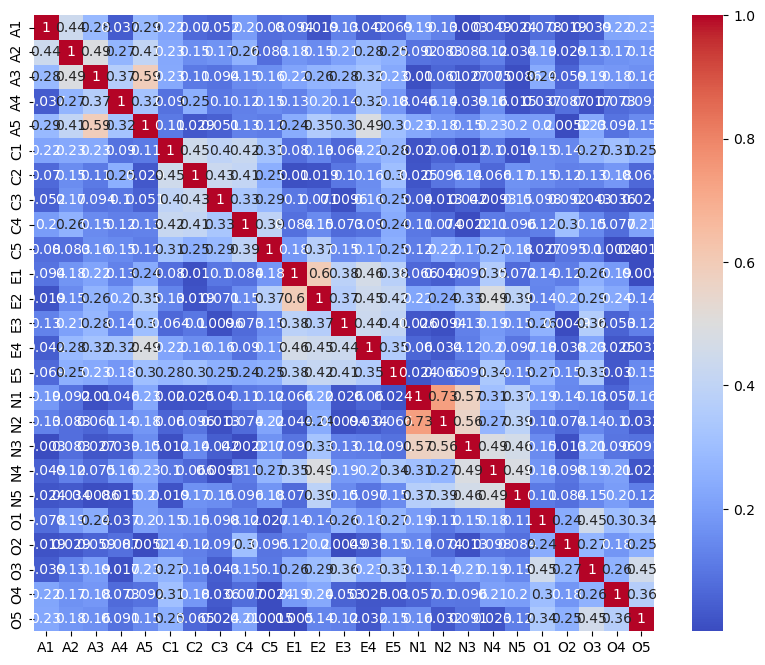

In [325]:
cor_matrix_abs = np.abs(cor_matrix)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cor_matrix_abs, annot=True, ax=ax, cmap='coolwarm')
plt.show()

In [326]:
# Hacer test de espericidad de Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value

(1724.4400359603571, 2.8259651328969683e-198)

### Puedo aplicar modelos de ordenación

In [327]:
# Aplicar criterio de Kaiser-Meyer-Olkin
kmo_all, kmo_model = calculate_kmo(df)

for i in range(0, len(kmo_all)):
    print(f'{df.columns[i]} es {kmo_all[i]}')

print(f'KMO total es {kmo_model}')


A1 es 0.6564929660799175
A2 es 0.7735070654654148
A3 es 0.6907094491939092
A4 es 0.7306930529436862
A5 es 0.7462910115299239
C1 es 0.7422635345684312
C2 es 0.7886578240264086
C3 es 0.759029329498768
C4 es 0.7646427791443149
C5 es 0.7434412171797944
E1 es 0.8001159809944658
E2 es 0.8135525933196849
E3 es 0.7862836761825913
E4 es 0.8076855699051748
E5 es 0.8253791497836803
N1 es 0.6954141511179622
N2 es 0.6743281827188545
N3 es 0.8236493756077662
N4 es 0.7866145523908944
N5 es 0.8173849155192077
O1 es 0.7850420751692534
O2 es 0.6450133654041308
O3 es 0.8056897738404369
O4 es 0.619804965613481
O5 es 0.774629419020732
KMO total es 0.7619276658136389


### Como es mayor a 0.7, para todos, puedo usar analisis factorial

In [328]:
# Determinar el número de factores
fa_minres = FactorAnalyzer(n_factors=3, rotation=None, method='minres', is_corr_matrix=True)
fa_minres.fit(cor_matrix)
# Obtener los eigenvalues
eigenvalues, vectors = fa_minres.get_eigenvalues()
eigenvalues

array([5.13682889, 3.05023606, 2.31065851, 1.90435487, 1.8347456 ,
       1.10073441, 0.91562436, 0.85021462, 0.81927544, 0.71429145,
       0.67264613, 0.64048646, 0.58794602, 0.54317843, 0.51924312,
       0.50666612, 0.45214636, 0.40696953, 0.39755923, 0.35043805,
       0.32910354, 0.28245039, 0.25716941, 0.23943821, 0.17759479])

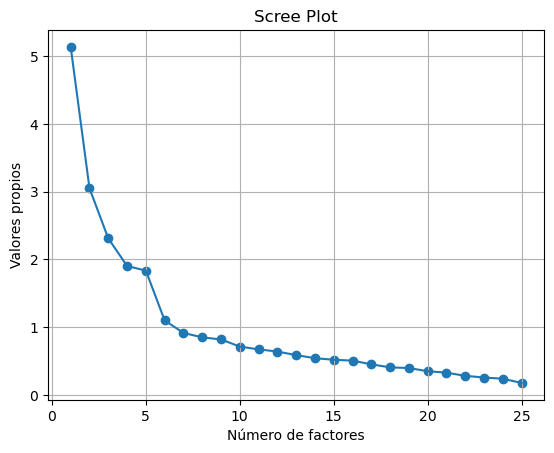

In [329]:
# Hacer grafico de sedimentación
plt.scatter(range(1, df.shape[1]+1), eigenvalues)
plt.plot(range(1, df.shape[1]+1), eigenvalues)
plt.title('Scree Plot')
plt.xlabel('Número de factores')
plt.ylabel('Valores propios')
plt.grid()
plt.show()

In [330]:
fa_mle = FactorAnalyzer(n_factors=3, rotation=None, method='mle', is_corr_matrix=True)
fa_mle.fit(cor_matrix)
# Obtener los eigenvalues
eigenvalues, vectors = fa_mle.get_eigenvalues()
eigenvalues

array([5.13682889, 3.05023606, 2.31065851, 1.90435487, 1.8347456 ,
       1.10073441, 0.91562436, 0.85021462, 0.81927544, 0.71429145,
       0.67264613, 0.64048646, 0.58794602, 0.54317843, 0.51924312,
       0.50666612, 0.45214636, 0.40696953, 0.39755923, 0.35043805,
       0.32910354, 0.28245039, 0.25716941, 0.23943821, 0.17759479])

In [333]:
comunalidades_mle = fa_mle.get_communalities()
comunalidades_minres = fa_minres.get_communalities()

comunalidades = pd.DataFrame({'Minres': comunalidades_minres, 'MLE': comunalidades_mle})
comunalidades.index = df.columns
comunalidades = comunalidades.sort_values('MLE', ascending=False)
comunalidades

,Minres,MLE
N1,0.702505,0.769967
N2,0.588589,0.675571
E2,0.635722,0.661853
E1,0.509812,0.540530
N3,0.551611,0.530453
N4,0.472981,0.457954
E5,0.428791,0.427107
C1,0.419656,0.401208
E4,0.422803,0.396090
O4,0.357508,0.366591
